In [1]:
import os
from google.colab import drive

# Acessando e acoplando o Google Drive ao Colab para facilitar o acesso de arquivos da minha máquina

drive.mount("/content/gdrive")
%cd /content/gdrive/MyDrive/desafio_stepps

Mounted at /content/gdrive
/content/gdrive/MyDrive/desafio_stepps


Nesse Collab realizei o treinamento do modelo YoloV7 utilizando sua API Python.

O processo é extremamente alto nível, mas o framework realiza pré e pós processamento e augmentações de excelente qualidade resultando em um modelo capaz de realizar Object Detection em um alto nível.

Além do que está descrito nesse documento, também produzi os respectivos .yaml necessários para o treinamento do dataset customizado, que podem ser encontrados em ... e ...

In [ ]:
%cd desafio_stepps

In [3]:
#git clone https://github.com/WongKinYiu/yolov7.git
%cd yolov7

/content/gdrive/MyDrive/desafio_stepps/yolov7


In [4]:
#!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt
#!python train.py --device 0 --batch-size 16 --epochs 200 --img 640 640 --data data/stepps.yaml --hyp data/hyp.scratch.custom.yaml --cfg cfg/training/yolov7-stepps.yaml --weights yolov7.pt --name yolov7-stepps

Após finalizado o treinamento, podemos executar o modelo na imagem de teste.

Como consta nas duas celulas abaixo, o classificador foi capaz de detectar 56 mamões na imagem.

In [5]:
!python detect.py --weights runs/train/yolov7-stepps4/weights/best.pt --conf 0.5 --img-size 640 --source data/test/test.JPG --no-trace


Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=True, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='data/test/test.JPG', update=False, view_img=False, weights=['runs/train/yolov7-stepps4/weights/best.pt'])
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.13.0+cu116 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
56 mamaos, Done. (27.5ms) Inference, (39.5ms) NMS
 The image with the result is saved in: runs/

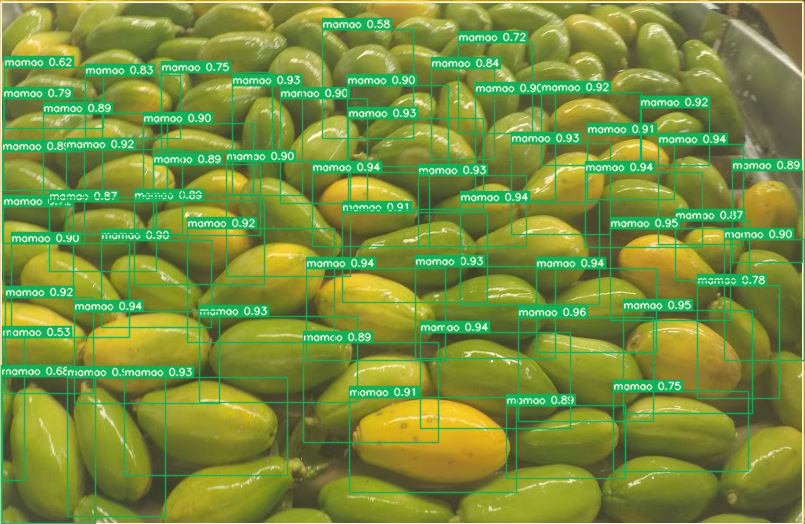

In [6]:
import PIL
PIL.Image.open('runs/detect/exp/test.JPG')